In [168]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import np_info_analysis as na
from scipy.interpolate import interp1d

In [2]:
FOLDER_NAME = '/exports'
yellow='#ffb200'
red='#DD5544'
blue='#0284C0'
black='#000000'    

In [66]:
def spr_spectrum(folder):
    main_folder='C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/'
    with open(main_folder + folder+'spectra_q.txt') as f:
        infolist = f.read()
        info = []
    for i in infolist.split('\n')[:-1]:
        info.append([float(j) for j in i.split('\t')])
    intensity = [] 
    wlength = []
    for row in info:
        wlength.append(row[4])
        intensity.append(row[5])
    return(wlength, intensity)

In [67]:
# Column 5 - TM/TE 1. Wavelength
# Column 6 - TM/TE 1. Value


folder = '20_02_25_P3/'

In [208]:
lms_m5_pre = [618, 620, 622, 624, 626, 616, 614, 610, 608, 604, 600, 598, 596, 592, 588, 584]
lms_m5 = lms_m5_pre[-1:-12:-1]+lms_pre[:5]
stds_m5_pre = [0.0014147408147551087, 0.001529187336240022, 0.001133565162553005, 0.001294663260476831, 0.0018250110685195816, 0.0013979504127213753, 0.002150912764593875, 0.0008859218021408325, 0.0009206898131512144, 0.000681883037618967, 0.0004948393598113671, 0.0005134477035506698, 0.0005114875201063441, 0.0006216098928466955, 0.0007606976532393678, 0.0008832930243481273]
ampli_m5_pre = [1019.7986276401984, 1593.5814262903618, 178.26115767747834, 750.0542823926801, 4498.691895843078, 1428.2623898799384, 4588.994617010943, 97.87083000481087, 628.1901079514287, 479.1661513746047, 0, 221.54956312445574, 29.83791014329123, 140.81694818616194, 124.74264930005944, 461.0280511223391]


stds_m5 = stds_m5_pre[-1:-12:-1]+stds_pre[:5]
ampli_m5 = ampli_m5_pre[-1:-12:-1]+ampli_m5_pre[:5]

In [209]:
lms_p3_pre = [630, 628, 626, 624, 622, 618, 615, 614, 612, 610, 608, 606, 602, 598]
lms_p3 = lms_p3_pre[::-1]

stds_p3_pre = [0.0028839016526188877, 0.0028501350531927373, 0.0032053129013605605, 0.00219491034750703, 0.0014453016108205135, 0.0012032807771632608, 0.000755227660109225, 0.0014247565138702993, 0.000597657130328384, 0.0008383513342096506, 0.0010519255779464934, 0.0009098638048705079, 0.0010214728477862653, 0.0011243949580882916]


ampli_p3_pre = [85.3841084846647, 85.02308779330727, 87.89613962082184, 78.60787283108748, 71.11832098188114, 63.13598305829841, 52.36786074050566, 66.30031155864185, 30.810250086992205, 57.86650959012218, 63.575601660095764, 47.51725348436853, 21.059270742909447, 24.501147635640315]

# suma v3eho nad limitem
ampli_p3_pre = [12114.227480226298, 12757.213676736805, 16522.441966325998, 9212.66152209186, 4744.669024801739, 3648.160762323163, 1216.900985668093, 4845.443408802263, 367.887800761575, 1446.0574362134876, 2037.6205982468375, 968.5968602048397, 42.118541485818895, 131.28420353479612]


stds_p3 = stds_p3_pre[::-1]
ampli_p3 = ampli_p3_pre[::-1]

In [210]:
lms_q3_orig = [730, 727, 728, 732, 734, 736, 740, 726, 724, 722, 718, 714, 744]
lms_q3_pre = [730, 727, 728, 732, 734, 736, 740, 726, 724, 722, 718, 714, 744]

stds_q3_pre = [0.0027463455180624674, 0.0007430645215359442, 0.0010280409579272426, 0.002049261554772608, 0.001957947200167179, 0.002042278774671029, 0.0024897093094356157, 0.0008454210927703794, 0.00116937546870555, 0.002199576120599377, 0.0020166156905113883, 0.0023587592487536555, 0.004490323486332851]

lms_q3_pre.sort()
lms_q3 = lms_q3_pre
indeces = [lms_q3_orig.index(l) for l in lms_q3_pre]
print(len(stds_q3_pre ))
stds_q3 = [stds_q3_pre[i] for i in indeces]

13


In [211]:
wlength, intensity = spr_spectrum('20_02_25_P3/')
spr_p3 = interp1d(wlength, intensity, kind='linear')

wlength, intensity = spr_spectrum('20_02_25_M5/')
spr_m5 = interp1d(wlength, intensity, kind='linear')

wlength, intensity = spr_spectrum('20_02_26_Q3/')
spr_q3 = interp1d(wlength, intensity, kind='linear')

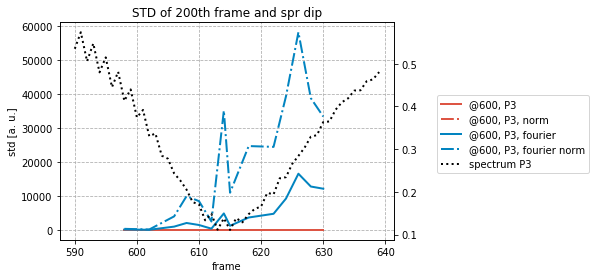

In [212]:
fig, axes = plt.subplots()
axes.grid(linestyle='--')
axes.set_title('STD of 200th frame and spr dip')
axes.set_xlabel('frame')
axes.set_ylabel('std [a. u.]')
axesII=axes.twinx()

axes.plot(lms_p3, stds_p3, linewidth=2, color=red, label='@600, P3') 
axes.plot(lms_p3, [stds_p3[i]/spr_p3(lms_p3[i]) for i in range(len(stds_p3))], linewidth=2, color=red, label='@600, P3, norm', ls = '-.')

axes.plot(lms_p3, [a for a in ampli_p3], linewidth=2, color=blue, label='@600, P3, fourier')
axes.plot(lms_p3, [ampli_p3[i]/spr_p3(lms_p3[i]) for i in range(len(ampli_p3))], linewidth=2, color=blue, label='@600, P3, fourier norm', ls = '-.')



# axes.plot(lms_m5, stds_m5, linewidth=2, color=red, label='@600, M5') 
# axes.plot(lms_m5, [stds_m5[i]/spr_m5(lms_m5[i]) for i in range(len(stds_m5))], linewidth=2, color=red, label='@600, M5, norm', ls = '-.')

wlength, intensity = spr_spectrum('20_02_25_P3/')
axesII.plot(wlength, intensity, linewidth=2, color=black, label='spectrum P3', ls = ':')    

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))


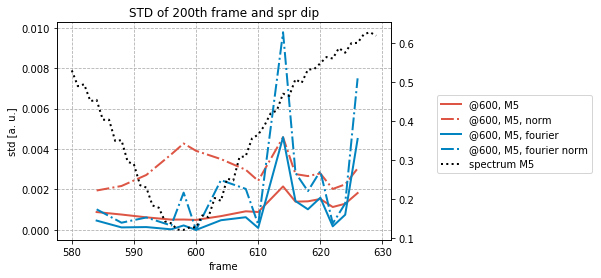

In [235]:
fig, axes = plt.subplots()
axes.grid(linestyle='--')
axes.set_title('STD of 200th frame and spr dip')
axes.set_xlabel('frame')
axes.set_ylabel('std [a. u.]')
axesII=axes.twinx()

axes.plot(lms_m5, stds_m5, linewidth=2, color=red, label='@600, M5') 
axes.plot(lms_m5, [stds_m5[i]/spr_m5(lms_m5[i]) for i in range(len(stds_m5))], linewidth=2, color=red, label='@600, M5, norm', ls = '-.')

axes.plot(lms_m5, [a/1e6 for a in ampli_m5], linewidth=2, color=blue, label='@600, M5, fourier')
axes.plot(lms_m5, [ampli_m5[i]/spr_m5(lms_m5[i])/1e6 for i in range(len(ampli_m5))], linewidth=2, color=blue, label='@600, M5, fourier norm', ls = '-.')



# axes.plot(lms_m5, stds_m5, linewidth=2, color=red, label='@600, M5') 
# axes.plot(lms_m5, [stds_m5[i]/spr_m5(lms_m5[i]) for i in range(len(stds_m5))], linewidth=2, color=red, label='@600, M5, norm', ls = '-.')

wlength, intensity = spr_spectrum('20_02_25_M5/')
axesII.plot(wlength, intensity, linewidth=2, color=black, label='spectrum M5', ls = ':')    

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))


<IPython.core.display.Javascript object>


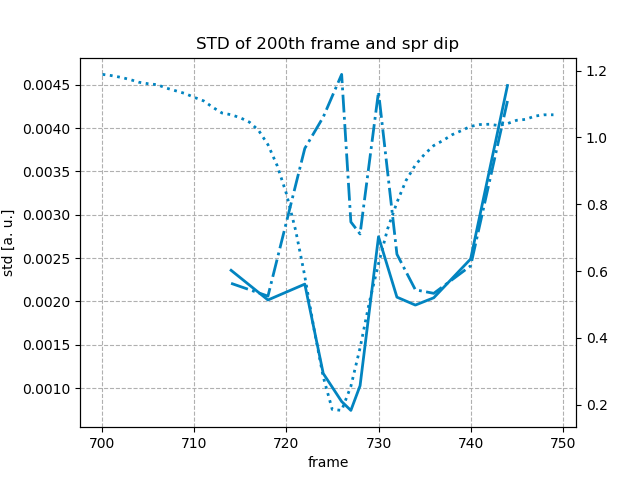

In [155]:
fig, axes = plt.subplots()
axes.grid(linestyle='--')
axes.set_title('STD of 200th frame and spr dip')
axes.set_xlabel('frame')
axes.set_ylabel('std [a. u.]')
axesII=axes.twinx()

axes.plot(lms_q3, stds_q3, linewidth=2, color=blue, label='@750, Q3') 
axes.plot(lms_q3, [stds_q3[i]/spr_q3(lms_q3[i]) for i in range(len(stds_q3))], linewidth=2, color=blue, label='@750, Q3, norm', ls = '-.')

# axes.plot(lms_m5, stds_m5, linewidth=2, color=red, label='@600, M5') 


wlength, intensity = spr_spectrum('20_02_26_Q3/')
axesII.plot(wlength, intensity, linewidth=2, color=blue, label='spectrum Q3', ls = ':')  
# wlength, intensity = spr_spectrum('20_02_25_M5/')
# axesII.plot(wlength, intensity, linewidth=2, color=red, label='spectrum, M5', ls = ':')  

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [202]:
n = 1.33
lm = 600/n
D = 75000

In [203]:
dlm = lm**2/(D+lm)

In [204]:
print(dlm)
print(dlm*n)

2.697326275329579
3.5874439461883405


In [241]:
35*

10.5